<a href="https://colab.research.google.com/github/thelionthelion/eth_ntifi/blob/main/NTIFI_Exercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Technologies in Banking and Finance
* ETH Zurich
* Machine Learning Coding Exercises
* Leo Widmer, MSc CS ETH, MAS MTEC candidate

## Task 1


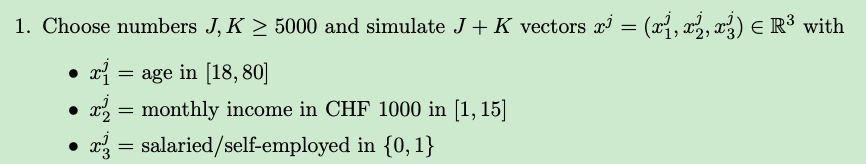

In [ ]:
J = 80000
K = 20000
JK = J + K

import numpy as np

rng = np.random.default_rng(seed=1987)

# generate feature vectors
ages = rng.uniform(low=18, high=80, size=JK)
incomes = rng.uniform(low=1, high=15, size=JK)
salaried = rng.binomial(n=1, p= 0.8, size=JK)
print(ages)
print(incomes)
print(salaried)

[34.57761718 57.97871349 38.61687797 ... 40.57098775 36.06598871
 66.75092885]
[10.28332977 12.40350568 14.3010926  ...  7.75159584 10.95468646
  6.53122728]
[0 1 1 ... 1 1 0]


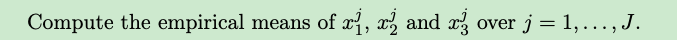

In [73]:
agesMean = np.mean(ages[0:J])
incomesMean = np.mean(incomes[0:J])
salariedMean = np.mean(salaried[0:J])
print(agesMean)
print(incomesMean)
print(salariedMean)


49.07465202172011
7.992400868674714
0.799225


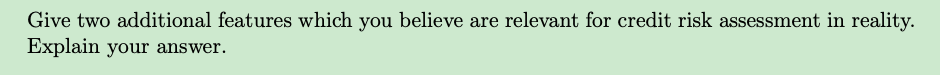

* Number of defaulted loans in the past: If a default happend before, it might be more likely to happen again
* Collateral available. If there is additional securities this might not decrease the risk itself of default, but it is relevant for the overall risk assessment as the bank might be able to recover some assets in case of default.

## Task 2

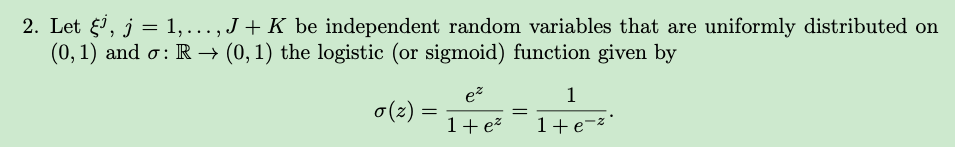

[0.68311997 0.57215102 0.72529043 ... 0.80230331 0.06717637 0.00477396]


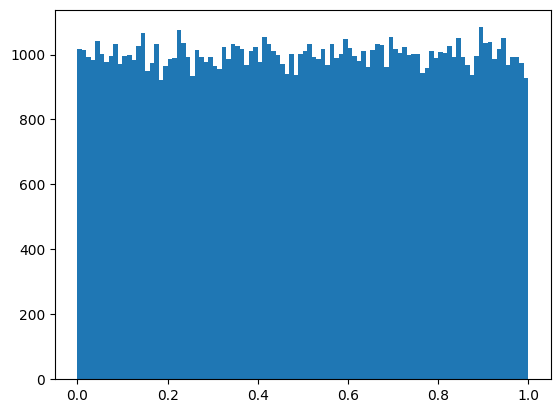

In [ ]:
import matplotlib.pyplot as plt
xi = rng.uniform(low=0, high=1, size=JK)
print(xi)
counts, bins = np.histogram(xi, 100)
plt.stairs(counts, bins, fill=True)

In [ ]:
def sigmoid(z):
    return 1 / (1+np.exp(-z))

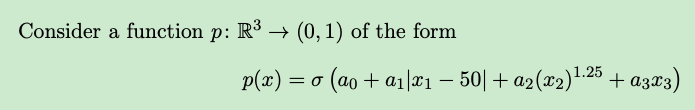

In [ ]:
def p(x,a0,a1,a2,a3):
    return sigmoid(a0 + a1 * abs(x[0] - 50) + a2 * pow(x[1],1.25) + a3 * x[2])

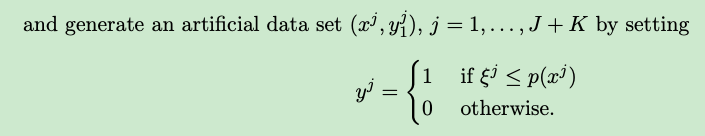

In [ ]:
def functional(a0,a1,a2,a3):
  labels = []
  for j in range(JK):
    res = p([ages[j],incomes[j], salaried[j]],a0,a1,a2,a3)
    labels.append(xi[j] <= res)
  else:
    return labels

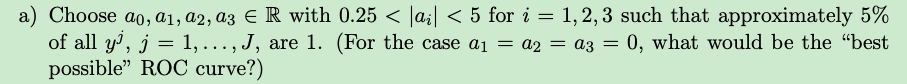

factor of defaults: 0.05102


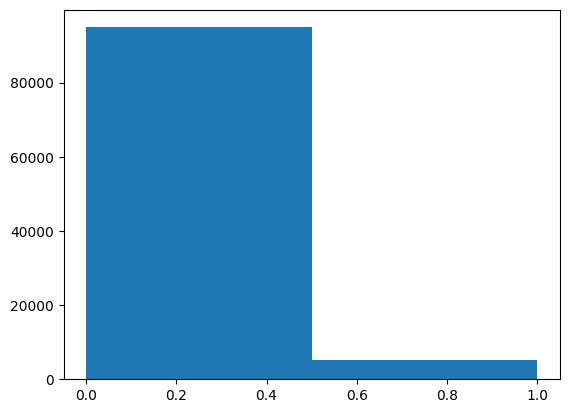

In [ ]:
groundTruth = functional(0.3, -5,0.8,-5)
counts, bins = np.histogram(groundTruth, 2)
plt.stairs(counts, bins, fill=True)
print('factor of defaults: ' + str(sum(groundTruth)/JK))

With a1,a2,a3 equal to zero the treshold of default only depends on a0. The best possible ROC curve is where a0 = -5 or +5. This is where nearly no one defaults (-5) over nearly every one defaults (+5). These probability distribution is easy to predict by a naive model.

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


factor of defaults: 0.00653


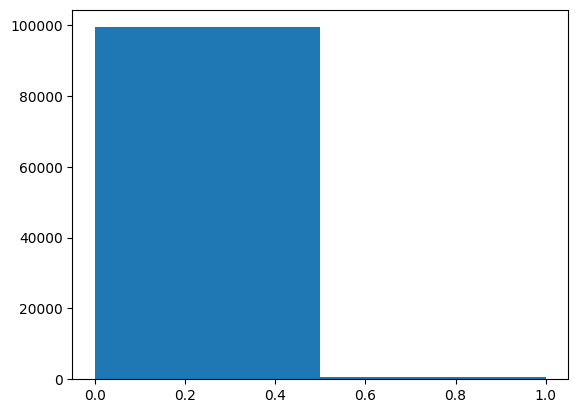

In [ ]:
groundTruthA0 = functional(-5,0,0,0)
counts, bins = np.histogram(groundTruth, 2)
plt.stairs(counts, bins, fill=True)
print('factor of defaults: ' + str(sum(groundTruth)/JK))

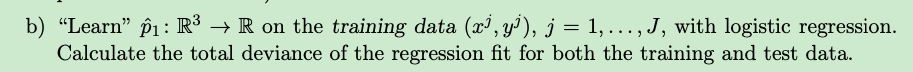

[[34.57761718 10.28332977  0.        ]
 [57.97871349 12.40350568  1.        ]
 [38.61687797 14.3010926   1.        ]
 ...
 [50.22882284  3.50239555  1.        ]
 [60.17959805 14.2353056   1.        ]
 [52.19981918  3.57803931  1.        ]]
[False False False ... False False False]
LogisticRegression()
[[34.57761718 10.28332977  0.        ]
 [57.97871349 12.40350568  1.        ]
 [38.61687797 14.3010926   1.        ]
 ...
 [50.22882284  3.50239555  1.        ]
 [60.17959805 14.2353056   1.        ]
 [52.19981918  3.57803931  1.        ]]
0


<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


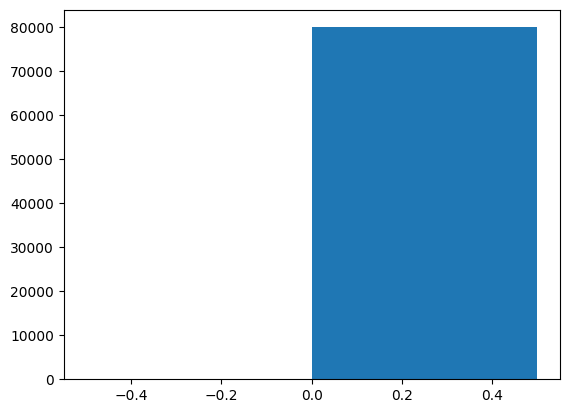

In [83]:
from sklearn import linear_model

agesTrain = ages[0:J]
incomesTrain = incomes[0:J]
salariedTrain = salaried[0:J]
featuresTrain = np.concatenate((agesTrain, incomesTrain, salariedTrain)).reshape((-1, 3), order='F')
print(featuresTrain)

labelsTrain = np.array(groundTruth)[0:J]
print(labelsTrain)

logr = linear_model.LogisticRegression()
logr.fit(featuresTrain,labelsTrain)
print(logr)

agesTest = ages[0:J]
incomesTest = incomes[0:J]
salariedTest = salaried[0:J]
featuresTest = np.concatenate((agesTest, incomesTest, salariedTest)).reshape((-1, 3), order='F')
print(featuresTest)

prediction = logr.predict(featuresTest.reshape(-1, 3))
counts, bins = np.histogram(prediction, 2)
plt.stairs(counts, bins, fill=True)
print(np.count_nonzero(prediction))

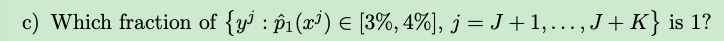

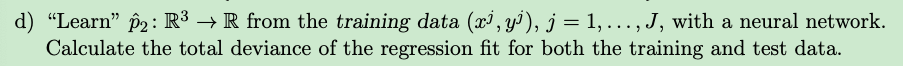

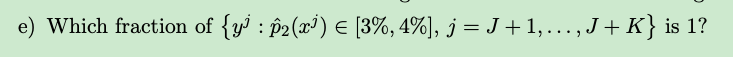

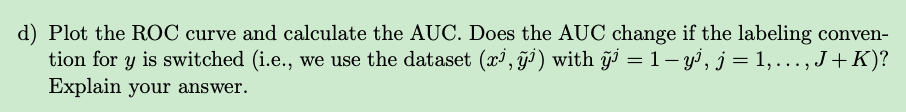

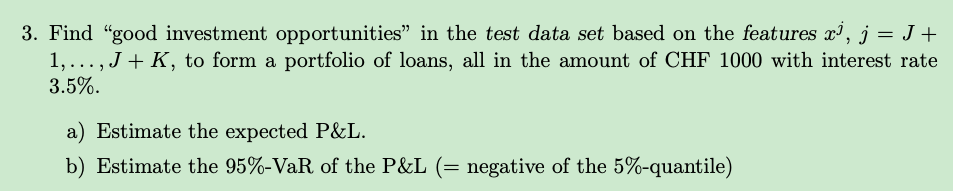

In [ ]:
#%tensorflow_version 1.x
import numpy as np
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Input, Dense, Conv2D, Concatenate, Dropout, Subtract, \
                        Flatten, MaxPooling2D, Multiply, Lambda, Add, Dot
from keras.backend import constant
from keras import optimizers

#from keras.engine.topology import Layer
from keras.models import Model
from keras.layers import Input
from keras import initializers
from keras.constraints import max_norm
import keras.backend as K
import matplotlib.pyplot as plt
import copy

In [ ]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(xi, 15000, density=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.show()